In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### 1. Generadores de números pseudoaleatorios

In [2]:
# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS PYTHON RANDOM
def random_python(N=100):
    numeros = []
    random.seed(11052022)
    [numeros.append(random.random())for i in range(N)]
    return numeros

In [3]:
# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS CUADRADOS MEDIOS
def cuadrados_medios(N,semilla,digitos):
    pseudoaleatorios = []
    xo = semilla
    xn = xo
    for i in range(N):
        xnn = xn ** 2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
        rn = ui / (int('9' * digitos) + 1)
        xn = ui
        pseudoaleatorios.append(rn)
    return pseudoaleatorios

In [4]:
# FUNCIÓN GEERADORA 100 NÚMEROS PSEUDOALEATORIOS CONGRUENCIA LINEAL
def congruencia_lineal(N, a, b, xo, m):
    pseudoaleatorios = []
    xn = xo
    for i in range(N):
        xnn = (a * xn + b) % m
        ui = xnn / m
        xn = xnn
        pseudoaleatorios.append(ui)
    return pseudoaleatorios

In [5]:
# FUNCIÓN COMPUERTA XOR PARA EL ALGORITMO DE TAUSWORTHE
def xor(br,bq):
    new_xor = 0
    if br == bq:
        new_xor = 0
    else:
        new_xor = 1
    return new_xor

# FUNCIÓN TRANSFORMACIÓN DE BINARIOA DECIMAL
def binario_a_decimal(binario):
    posicion = 0
    decimal = 0
    binario = binario[::-1]
    for digito in binario:
        multiplicador = 2 ** posicion
        decimal += int(digito) * multiplicador
        posicion += 1
    return decimal

# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS TAUSWORTHE
def tausworthe(N, r, q, l):
    pseudoaleatorios = []
    p = (2 ** q) - 1
    B = {}
    for i in range(1,q+1):
        key = "B" + str(i)
        B[key] = 1
    #for i in range(1,p-r):
    for i in range(500 - q + 1):
        keyo = "B" + str(i + q)
        keyr = "B" + str((i + q) - r)
        keyq = "B" + str((i + q) - q)
        B[keyo] = xor(B.get(keyr), B.get(keyq))
    binarios = []
    for key in B:
        binarios.append(B[key])
    n = l
    output = [binarios[i:i + n] for i in range(0, len(binarios), n)]
    binarios_generados = []
    for i in range(0,len(output)):
        binarios_generados.append("".join(str(_)for _ in output[i]))
    for binario in binarios_generados:
        aleatorio = binario_a_decimal(binario) / (2 ** l)
        pseudoaleatorios.append(aleatorio)
    return pseudoaleatorios

### 2. Chi Cuadrado

In [6]:
# FUNCIÓN PARA EL CONTEO DE LA CANTIDAD DE NÚMEROS DENTRO DE CADA INTERVALO
def calcular_chi(numeros):
    tablas = {}
    for i in np.arange(0.1, 1.1, 0.1):
        for j in numeros:
            if j > i-0.1 and j <= i:
                tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)] + 1 if round(i-0.1,1) in tablas else 1
    return tablas

In [7]:
# FUNCIÓN PARA APLICAR LA FORMULA Y OBTENER LA DESVIACIÓN ESTANDAR DE CADA INTERVALO
def sumatoria_chi(tabla, E):
    return sum([(valor - E) ** 2/E for valor in tabla.values()])

In [8]:
def graficar(tabla):
    plt.bar(range(len(tabla)), list(tabla.values()), tick_label=list(tabla.keys()))
    plt.show()

### 3. Calculos

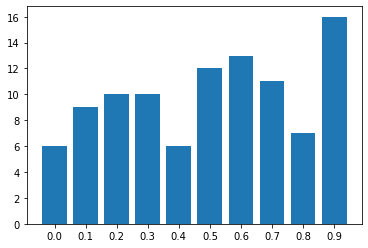

Valor de chi cuadrado: 9.200000000000001


In [10]:
numeros = cuadrados_medios(100,74731897457,7)
tablas = calcular_chi(numeros)
graficar(tablas)
print("Valor de chi cuadrado: " + str(sumatoria_chi(tablas, 10)))

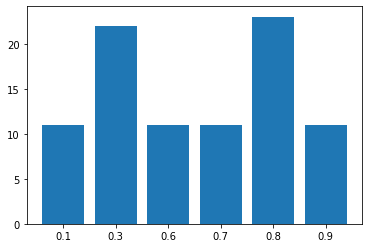

Valor de chi cuadrado: 31.7


In [11]:
numeros = congruencia_lineal(100, 74731897457, 37747318974, 7, 19)
tablas = calcular_chi(numeros)
graficar(tablas)
print("Valor de chi cuadrado: " + str(sumatoria_chi(tablas, 10)))

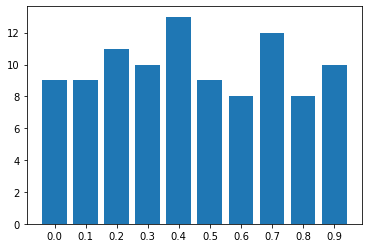

Valor de chi cuadrado: 2.5


In [12]:
numeros = tausworthe(100, 3, 7, 5)
tablas = calcular_chi(numeros)
graficar(tablas)
print("Valor de chi cuadrado: " + str(sumatoria_chi(tablas, 10)))

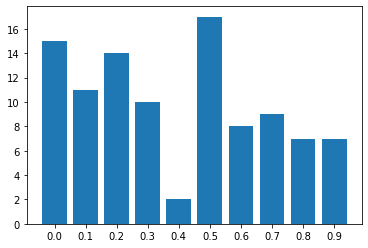

Valor de chi cuadrado: 17.8


In [13]:
numeros = random_python()
tablas = calcular_chi(numeros)
graficar(tablas)
print("Valor de chi cuadrado: " + str(sumatoria_chi(tablas, 10)))

### 4. Resultados

**Nota:** Con 10 grados de libertad, aprueba si chi cuadrado <= 16.9
+ Chi Cuadrado:
    - Cuadrados Medios: 9.200000000000001 - Aprueba
    - Congruencia Lineal: 31.7 - No Aprueba
    - Tausworthe: 2.5 - Aprueba
    - Random Python: 17.8 - No Aprueba